# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [3]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/ESAA/abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [5]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [6]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [14]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [18]:
#릿지모델 생성 및 훈련
ridge=Ridge(alpha=0.3)
ridge.fit(X_train, y_train)

#예측값 구하기
ridge_pred = ridge.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
predicted_age = ridge_pred + 1.5

#MSE와 RMSE구하기
mse = mean_squared_error(y_test, ridge_pred)
rmse = np.sqrt(mse)

print('mse:',mse)
print('rmse:',rmse)

mse: 5.013158686100955
rmse: 2.239008415817358


3-3) 릿지 모델에서 회귀 계수 값을 구해 알 수 있는 점을 작성하시오. (각 컬럼의 정보는 data.colums 참고)

In [19]:
data.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'M', 'F', 'I'],
      dtype='object')

In [20]:
ridge.coef_

array([  1.73062279,   8.56114901,   6.40027294,   8.00631388,
       -18.8700486 ,  -8.93416969,  10.53260417,   0.33051426,
         0.2389856 ,  -0.56949986])

* 릿지 모델의 회귀 계수는 각 입력 변수(길이, 직경, 높이, 무게, 성별)가 전복의 고리 수에 미치는 영향의 방향(양수/음수)
과 상대적인 크기를 나타냄
* 계수가 양수인 변수는 값이 증가할수록 고리 수가 증가하는 경향을, 음수인 변수는 고리 수가 감소하는 경향을 의미
* 절댓값이 클수록 그 변수가 전복의 나이에 더 큰 영향을 미친다고 볼 수 있음
* 따라서 전복의 크기와 무게가 클수록 나이가 많아지는지, 성별에 따라 평균 나이가 어떻게 다른지 등을 파악할 수 있으며, 릿지 회귀 특성상 다중공선성을 완화한 상태에서 변수들의 상대적 중요도 해석 가능
* 실제 계수 값을 보면, Whole weight와 Shell weight의 계수가 다른 변수보다 크고 양수이므로, 전복의 전체 무게와 껍데 기 무게가 클수록 고리 수(나이)가 증가하는 경향이 강한 것으로 보임
* 반면 Shucked weight의 계수는 음수로 나타나, 다른 조건이 같을 때 살 무게가 큰 개체는 상대적으로 고리 수가 적을 수
* 또한 성별 더미 변수 중 l(infant)의 계수가 음수인 것은, infant가 M, F에 비해 평균적으로 고리 수가 적다는 점과 일치.

3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [10]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [21]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas :
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train, y_train)
  ridge_predict = ridge.predict(X_test)
  mse = mean_squared_error(y_test, ridge_predict)
  rmse = np.sqrt(mse)
  print(alpha, rmse)

  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))

print(avg_rmse)

0 2.236928923256222
0.1 2.237472829455988
1 2.2455306987205312
10 2.3468324593231444
100 2.594562224639499
2.621188059927813


In [22]:
neg_mse_scores

array([-14.76006635,  -4.02631472,  -7.71889931,  -4.97361093,
        -5.05817693])

0.1일때 성능이 좋음

## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [24]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [27]:
#모델 생성 및 훈련
model = XGBRegressor(
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 5,
    subsmaple = 0.5,
    colsample_bytree = 0.5,
    random_state = 42)

model.fit(X_train, y_train)

#예측값 구하기
y_pred = model.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_test_age = y_test + 1.5
y_pred_age = y_pred + 1.5

#MSE와 RMSE 구하기
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE : ', mse)
print('RMSE : ', rmse)

MSE :  4.837031841278076
RMSE :  2.1993253150177843


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

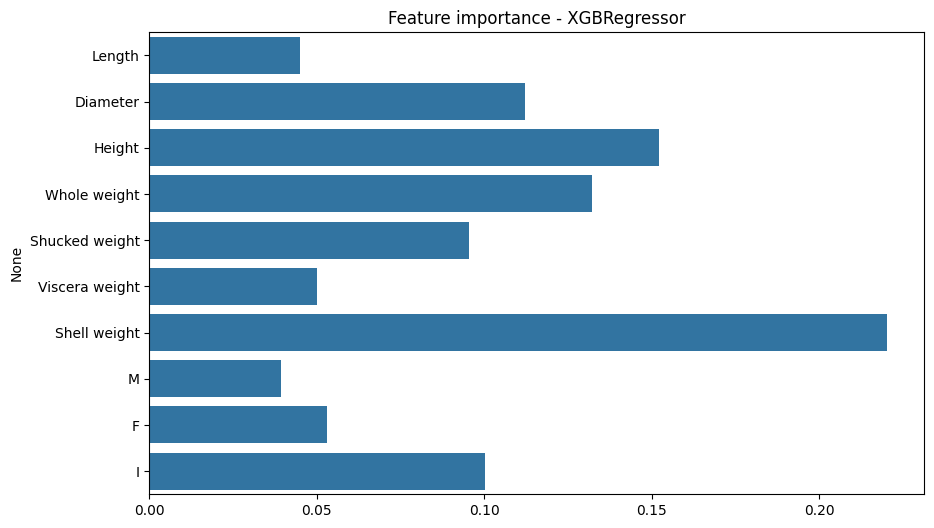

In [29]:
import seaborn as sns
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

importance = model.feature_importances_

feature_names = data.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importance, y=feature_names)
plt.title('Feature importance - XGBRegressor')
plt.show()


---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [31]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [32]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [33]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape
y_train.shape

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [34]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)

LogisticRegression()

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [35]:
#기울기
print('기울기 ', lr_clf.coef_)

기울기  [[-1.99751338e-01  3.65451144e-01  1.49472353e-01 -1.88027194e-01
  -2.28494592e-02  1.95456785e-01  4.66701970e-01 -1.66796877e-02
   8.23898405e-02  6.75013134e-02 -1.92622072e-02  2.94916201e-01
   7.42522347e-03]
 [ 5.96476523e-01 -7.88673910e-01 -1.26181652e-01  2.12254429e-01
  -1.13504086e-02  3.15786394e-01  3.55148523e-01  3.34675938e-02
   2.79036084e-01 -1.17202662e+00  2.61166065e-01  4.64732238e-01
  -8.33633769e-03]
 [-3.96725185e-01  4.23222765e-01 -2.32907005e-02 -2.42272356e-02
   3.41998678e-02 -5.11243179e-01 -8.21850494e-01 -1.67879061e-02
  -3.61425924e-01  1.10452531e+00 -2.41903857e-01 -7.59648438e-01
   9.11114220e-04]]


In [37]:
#절편
print('절편 ', lr_clf.intercept_)

절편  [-0.04177842  0.09551058 -0.05373216]


3-3) 모델의 정확도를 구하세요.

In [38]:
#모델의 예측값 구하기
y_pred_lr = lr_clf.predict(x_test)

#모델의 정확도 구하기
accuracy = metrics.accuracy_score(y_test, y_pred_lr)
print('accuracy: ', accuracy)

accuracy:  0.9629629629629629
